Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [2]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

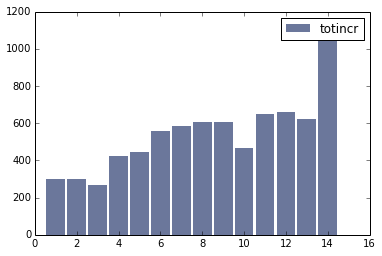

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

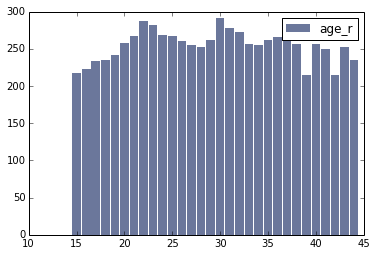

In [4]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

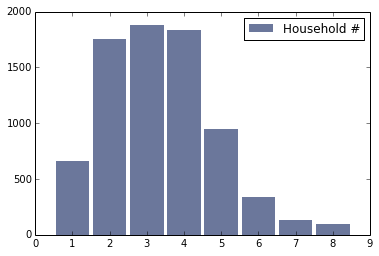

In [5]:
hist = thinkstats2.Hist(resp.roscnt)
thinkplot.Hist(hist, label='Household #')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

Ans: Normal Distribution (but halved, since negative nunmbers are invalid options); alternatively, depending on how the numbers work out, it could also be an Exponential distribution

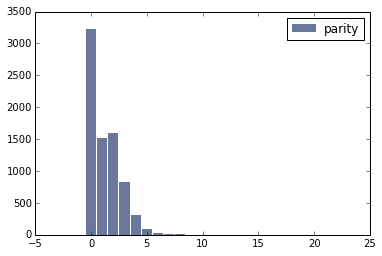

In [16]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show()

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [40]:
a = hist.Largest(1)
print ["Largest value of parity is: " + str(a[0][0])]

['Largest value of parity is: 22']


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

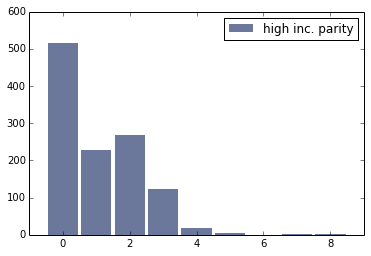

In [57]:
highest_inc = resp[resp.totincr==14]
hist = thinkstats2.Hist(highest_inc.parity)
thinkplot.Hist(hist, label='high inc. parity')
thinkplot.Show()


Find the largest parities for high income respondents.

In [68]:
b = hist.Largest(5)

print ['highest parity for high income respondents: ' + str(b[0][0])]

['highest parity for high income respondents: 8']


Compare the mean <tt>parity</tt> for high income respondents and others.

In [72]:
others = resp[resp.totincr<14]

print ['mean parity for high income respondents: ' + str(highest_inc.parity.mean())]
print ['mean parity for all other respondents: ' + str(others.parity.mean())]


['mean parity for high income respondents: 1.07586206897']
['mean parity for all other respondents: 1.24957581367']


Investigate any other variables that look interesting.

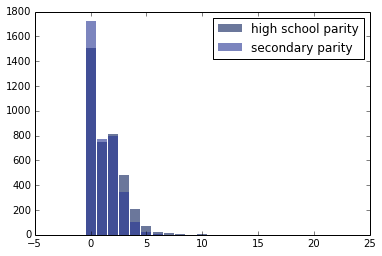

['mean parity for high school respondents: 1.39020618557']
['mean parity for secondary respondents: 1.05102311985']


In [98]:
#Looking at parity as categorized by primary vs secondary education

high_school = resp[resp.educat < 13]
secondary = resp[resp.educat >= 13]

hist1 = thinkstats2.Hist(high_school.parity)
hist2 = thinkstats2.Hist(secondary.parity)
thinkplot.Hist(hist1, label='high school parity')
thinkplot.Hist(hist2, label='secondary parity')

thinkplot.Show()

print ['mean parity for high school respondents: ' + str(high_school.parity.mean())]
print ['mean parity for secondary respondents: ' + str(secondary.parity.mean())]



### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [85]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [89]:
import nsfg
df = nsfg.ReadFemPreg()
firsts = df[df.birthord==1]
others = df[df.birthord>1]

print ["Cohen's d for baby weight: " + str(CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb))]
print ["Cohen's d for pregnancy duration: " + str(CohenEffectSize(firsts.prglngth, others.prglngth))]
print ["both are insignificant"]




["Cohen's d for baby weight: -0.0886729270726"]
["Cohen's d for pregnancy duration: 0.0288790446544"]
['both are insignificant']
